<a href="https://colab.research.google.com/github/MuhammadHassan667410/Learning-Complete-Artificial-Intelligence/blob/main/Phase%202%20%3A%20Machine%20Learning/Supervised%20ML(Regression%20and%20Classification)/PolynomialRegression_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
data.region = data.region.replace({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})
data.smoker = data.smoker.replace({'yes':1, 'no':2})
data.sex = data.sex.replace({'male':1, 'female':2})
data

/tmp/ipython-input-7-2287820012.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.region = data.region.replace({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})
/tmp/ipython-input-7-2287820012.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.smoker = data.smoker.replace({'yes':1, 'no':2})
/tmp/ipython-input-7-2287820012.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,1,16884.92400
1,18,1,33.770,1,2,2,1725.55230
2,28,1,33.000,3,2,2,4449.46200
3,33,1,22.705,0,2,3,21984.47061
4,32,1,28.880,0,2,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,2,3,10600.54830
1334,18,2,31.920,0,2,4,2205.98080
1335,18,2,36.850,0,2,2,1629.83350
1336,21,2,25.800,0,2,1,2007.94500


In [ ]:
y = data.charges
x = data.drop(['charges'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)
poly.fit(x_train_poly, y_train)
lr.fit(x_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test_poly)


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
y_pred_r2 = r2_score(y_test, y_pred)
y_pred_r2

-2.70627598590444

In [ ]:
mean_absolute_error(y_test, y_pred)

10501.405091902197

In [ ]:
mean_squared_error(y_test, y_pred)

614041640.2972845

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)
poly.fit(x_train_poly, y_train)
lr.fit(x_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test_poly)

In [ ]:
mean_absolute_error(y_test, y_pred)

2908.8751968328197

In [ ]:
y_pred_train = lr.predict(x_train_poly)
mean_absolute_error(y_train, y_pred_train)

2816.4697811447927

In [ ]:
r2_score(y_test, y_pred)

0.8368175911272302

In [ ]:
mean_squared_error(y_test, y_pred)

27035437.83381954

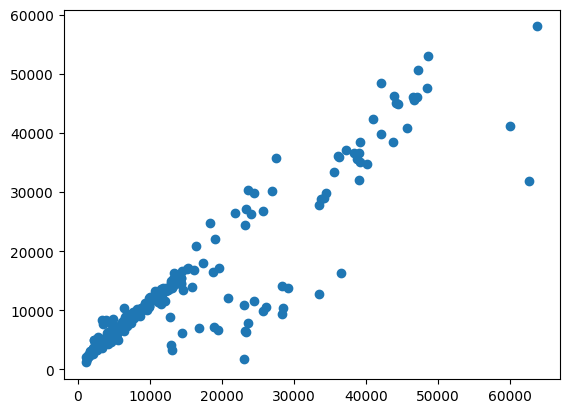

In [ ]:
plt.scatter(y_test, y_pred)

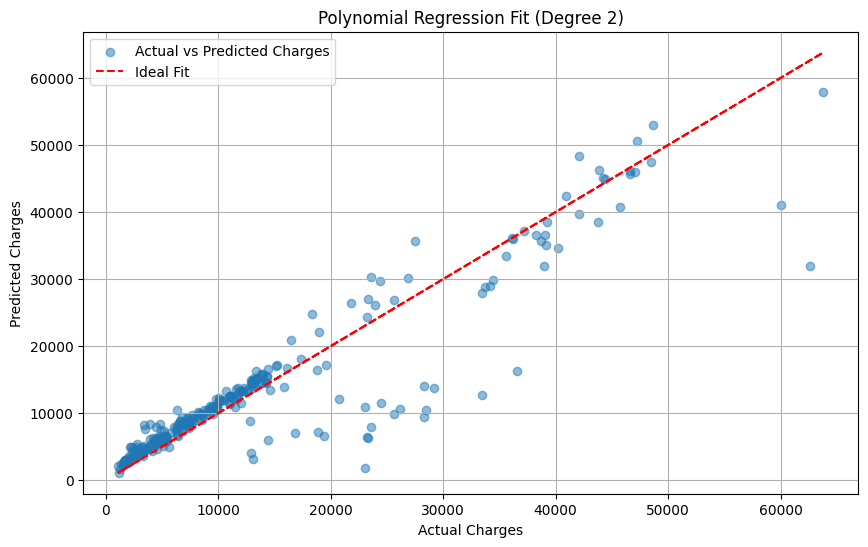

In [ ]:
# Generate a range of x values for plotting the curve
x_range = pd.DataFrame(scaler.transform(x_test))
x_range_poly = poly.transform(x_range)
y_range_pred = lr.predict(x_range_poly)

# Plot the polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Actual vs Predicted Charges')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Polynomial Regression Fit (Degree 2)')
plt.legend()
plt.grid(True)
plt.show()